# Imports

In [22]:
#########################
#       Imports         #
######################### 
  
# Dataframe/Array manipulation                   
import pandas as pd
import numpy as np
# Visualiztion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Data Import

In [2]:
movies_df = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/sethvfriesz/SDSU-DS-Symposium/main/Movies/IMDB-Movie-Data.csv',
    engine = 'python'
)
#movies_df = pd.read_csv("IMDB-Movie-Data.csv")

In [3]:
movies_df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [127]:
# Director Analysis - Who was the best director in this time period?
director_df = pd.DataFrame(
    np.stack(
    (np.sort(np.unique(movies_df["Director"])),
    [np.round(np.mean(movies_df.loc[movies_df["Director"] == x,"Rating"]),2) for x in np.sort(np.unique(movies_df["Director"]))],
    [np.round(np.mean(movies_df.loc[movies_df["Director"] == x,"Metascore"]),2) for x in np.sort(np.unique(movies_df["Director"]))],
    [np.round(np.mean(movies_df.loc[movies_df["Director"] == x,"Runtime (Minutes)"]),2) for x in np.sort(np.unique(movies_df["Director"]))],
    [movies_df.loc[movies_df["Director"] == x,["Title","Rating"]].sort_values("Rating",ascending=False).reset_index(drop = True).loc[0,"Title"] for x in np.sort(np.unique(movies_df["Director"]))],
    [movies_df.loc[movies_df["Director"] == x,].shape[0] for x in np.sort(np.unique(movies_df["Director"]))]
    ),
    axis = 1
    ),
    columns=['Director','Average Critic Rating','Average Metascore','Average Runtime','Highest Rated Movie', "Amount of Movies in Top 1000"])
director_df

,Director,Average Critic Rating,Average Metascore,Average Runtime,Highest Rated Movie,Amount of Movies in Top 1000
0,Aamir Khan,8.5,42.0,165.0,Taare Zameen Par,1
1,Abdellatif Kechiche,7.8,88.0,180.0,La vie d'Adèle,1
2,Adam Leon,6.5,77.0,82.0,Tramps,1
3,Adam McKay,7.0,65.5,110.75,The Big Short,4
4,Adam Shankman,6.3,64.0,120.0,Hairspray,2
...,...,...,...,...,...,...
639,Xavier Dolan,7.55,61.0,118.0,Mommy,2
640,Yimou Zhang,6.1,42.0,103.0,The Great Wall,1
641,Yorgos Lanthimos,7.2,77.5,106.5,Kynodontas,2
642,Zack Snyder,7.04,48.0,136.6,300,5


# Simple Seaborn Histogram

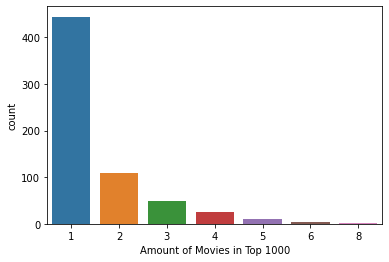

In [5]:
sns.countplot(
    data=director_df,
    x = "Amount of Movies in Top 1000")
plt.show()
# Presents information, but doesn't tell a story. We can do more to help tell a story

# Adding a few features

<AxesSubplot:title={'center':'Amount of Directors per Amount of Movies Directed in Top 1000'}, xlabel='Amount of Movies in Top 1000', ylabel='Total Amount of Directors'>

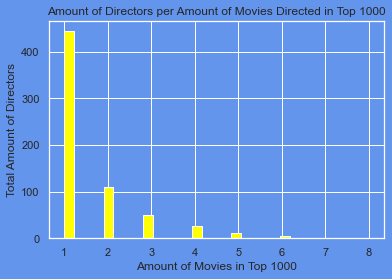

In [6]:
sns.set_style("dark")
sns.set(rc = {'axes.facecolor': 'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
ax = sns.histplot(
    data = director_df,
    x = "Amount of Movies in Top 1000",
    stat = "count", #Default
    color = 'yellow', 
    alpha = 1
)
ax.set(
    xlabel = 'Amount of Movies in Top 1000',
    ylabel = 'Total Amount of Directors',
    title = 'Amount of Directors per Amount of Movies Directed in Top 1000'
)
ax

# Plotly

In [20]:
fig = px.histogram(
    data_frame = director_df,
    x = "Amount of Movies in Top 1000"
)
#fig
fig.update_layout(
    bargap = 0.2,
    title_text = "Amount of Directors per Amount of Movies Directed in Top 1000",
    title_font_size = 20,
    xaxis_title = "Amount of Movies in Top 1000",
    yaxis_title = "Total Amount of Directors")

In [129]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = director_df["Amount of Movies in Top 1000"],
    marker_color = "red"))
fig.update_layout(
    bargap = 0.2,
    title = {
        'text': f"""<b>Amount of Directors per Amount of Movies Directed in Top 1000<b>""",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        "font_family": "Arial",
        "font_size": 25,
        "font_color": "Black"},
    #title_font_family = "Times New Roman",    
    #title_font_size = 20,
    #title_font_color = "red",
    #xaxis_title = "Amount of Movies in Top 1000",
    plot_bgcolor = "white",
    paper_bgcolor = "whitesmoke",
    width = 1500,
    height = 800)
fig.update_xaxes(
    title = {
        "text": "Amount of Movies in Top 1000",
        "font_size":15,
        "font_color": "black",
        "font_family": "Arial"
    } ) 
fig.update_yaxes(
    title = {
        "text": "Total Amount of Directors",
        "font_size":15,
        "font_color": "black",
        "font_family": "Arial"
    }
)
fig.show()

# Further Analysis of Directors
## Directors with 3 or more movies


In [116]:
director_df

,Director,Average Critic Rating,Average Metascore,Average Runtime,Highest Rated Movie,Amount of Movies in Top 1000
0,Aamir Khan,8.5,42.0,165.0,Taare Zameen Par,1
1,Abdellatif Kechiche,7.8,88.0,180.0,La vie d'Adèle,1
2,Adam Leon,6.5,77.0,82.0,Tramps,1
3,Adam McKay,7.0,65.5,110.75,The Big Short,4
4,Adam Shankman,6.3,64.0,120.0,Hairspray,2
...,...,...,...,...,...,...
639,Xavier Dolan,7.55,61.0,118.0,Mommy,2
640,Yimou Zhang,6.1,42.0,103.0,The Great Wall,1
641,Yorgos Lanthimos,7.2,77.5,106.5,Kynodontas,2
642,Zack Snyder,7.04,48.0,136.6,300,5


In [119]:
director_df2 = director_df.loc[director_df["Amount of Movies in Top 1000"] >= 3,]
director_df2

,Director,Average Critic Rating,Average Metascore,Average Runtime,Highest Rated Movie,Amount of Movies in Top 1000
3,Adam McKay,7.0,65.5,110.75,The Big Short,4
13,Alejandro González Iñárritu,7.77,77.67,139.33,The Revenant,3
19,Alexandre Aja,6.18,48.0,105.75,Horns,4
32,Andrew Stanton,7.47,64.0,109.0,WALL·E,3
46,Antoine Fuqua,7.04,52.4,126.2,Southpaw,5
...,...,...,...,...,...,...
619,Tom Tykwer,7.03,56.33,139.0,Cloud Atlas,3
630,Wes Anderson,7.9,85.0,93.33,The Grand Budapest Hotel,3
634,Will Gluck,6.33,56.0,106.33,Easy A,3
638,Woody Allen,7.02,69.4,99.2,Midnight in Paris,5


In [126]:
scatter_fig = px.scatter(
    data_frame=director_df2,
    x = "Average Critic Rating",
    y = "Average Metascore",
    color= "Amount of Movies in Top 1000",
    hover_name = "Director",
    hover_data = ["Average Critic Rating","Average Metascore"])
scatter_fig

In [164]:
director_list = director_df2.loc[(director_df2["Average Critic Rating"] >= 7.0) & (director_df2["Average Metascore"] >= 70), "Director"]
top_director_movies = movies_df.loc[movies_df["Director"].isin(director_list),["Director","Title","Rank","Revenue (Millions)"]].reset_index(drop = True)

In [157]:
top_director_movies

,Director,Title,Rank,Revenue (Millions)
0,Paul Greengrass,Jason Bourne,18,162.16
1,Denis Villeneuve,Arrival,20,100.50
2,Christopher Nolan,Interstellar,37,187.99
3,J.J. Abrams,Star Wars: Episode VII - The Force Awakens,51,936.63
4,Christopher Nolan,The Dark Knight,55,533.32
...,...,...,...,...
81,Danny Boyle,127 Hours,818,18.33
82,J.J. Abrams,Mission: Impossible III,870,133.38
83,Alejandro González Iñárritu,Babel,886,34.30
84,Paul Thomas Anderson,The Master,930,16.38


<AxesSubplot:>

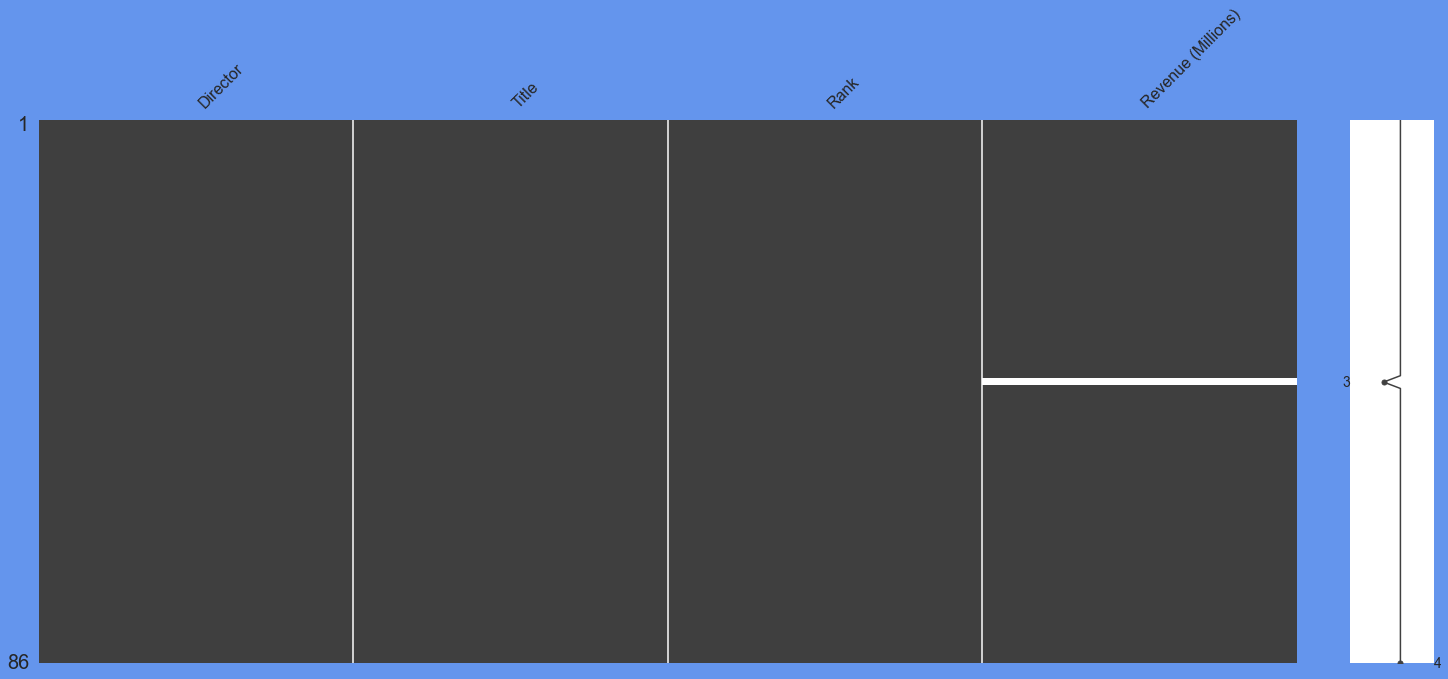

In [151]:
#pip install missingno
import missingno
missingno.matrix(top_director_movies)

In [155]:
top_director_movies[top_director_movies["Revenue (Millions)"].isna()]

,Director,Title,Rank,Revenue (Millions)
41,Quentin Tarantino,Death Proof,283,NaN


<AxesSubplot:>

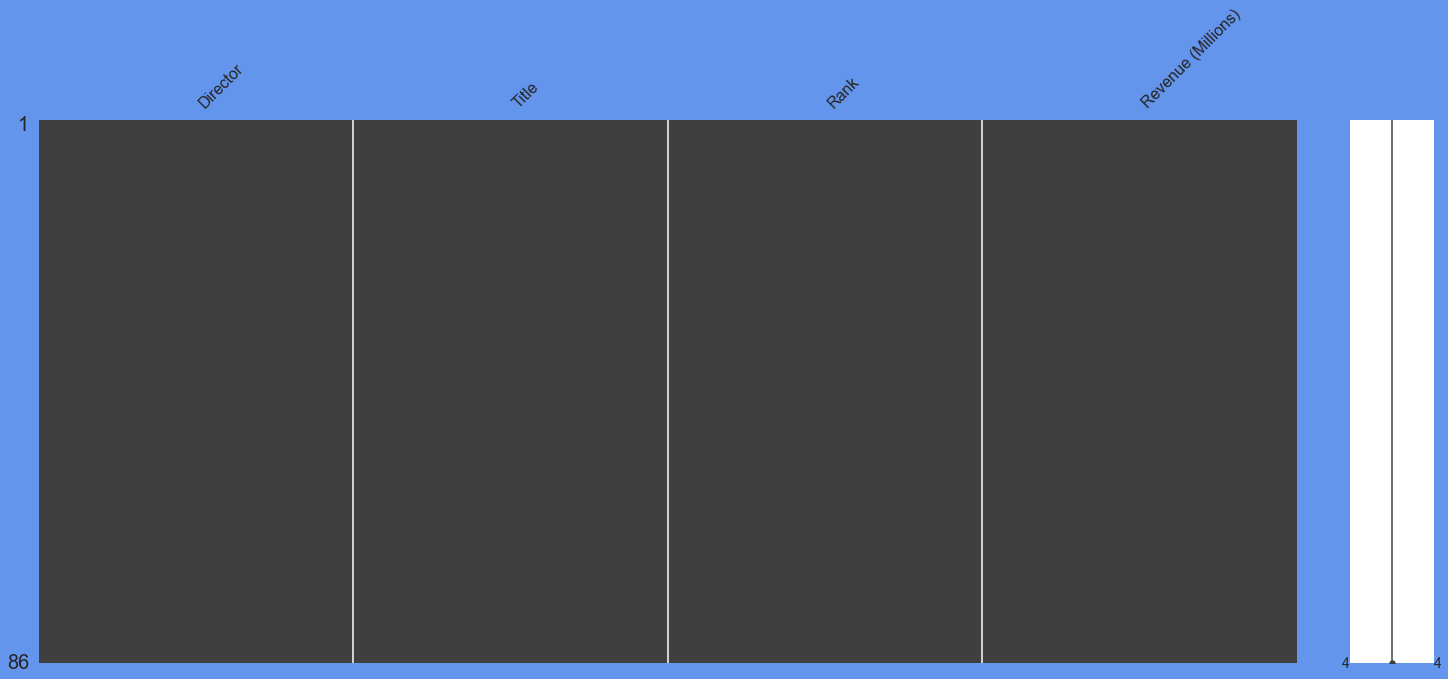

In [160]:
# Per Screenrant, 'Death Proof' from Quentin Tarantino grossed $31,588,881, which includes a 2010 rerelease
top_director_movies.loc[top_director_movies["Title"] == "Death Proof", "Revenue (Millions)"] = 31.59
missingno.matrix(top_director_movies)

In [156]:
final_director_df = pd.DataFrame(
    np.stack(
    (np.sort(np.unique(top_director_movies["Director"])),
    [np.round(np.mean(movies_df.loc[movies_df["Director"] == x,"Rating"]),2) for x in np.sort(np.unique(movies_df["Director"]))],
    [np.round(np.mean(movies_df.loc[movies_df["Director"] == x,"Metascore"]),2) for x in np.sort(np.unique(movies_df["Director"]))],
    [np.round(np.mean(movies_df.loc[movies_df["Director"] == x,"Runtime (Minutes)"]),2) for x in np.sort(np.unique(movies_df["Director"]))],
    [movies_df.loc[movies_df["Director"] == x,["Title","Rating"]].sort_values("Rating",ascending=False).reset_index(drop = True).loc[0,"Title"] for x in np.sort(np.unique(movies_df["Director"]))],
    [movies_df.loc[movies_df["Director"] == x,].shape[0] for x in np.sort(np.unique(movies_df["Director"]))]
    ),
    axis = 1
    ),
    columns=['Director','Average Critic Rating','Average Metascore','Average Runtime','Highest Rated Movie', "Amount of Movies in Top 1000"])

31588881

In [174]:
final_director = pd.DataFrame(
    np.stack(
        (np.sort(np.unique(top_director_movies["Director"])),
        [np.round(np.mean(top_director_movies.loc[top_director_movies["Director"] == x,"Rank"]),2) for x in np.sort(np.unique(top_director_movies["Director"]))],
        [np.round(np.mean(top_director_movies.loc[top_director_movies["Director"] == x,"Revenue (Millions)"]),2) for x in np.sort(np.unique(top_director_movies["Director"]))]
    ),
    axis = 1
    ),
    columns = ['Director', 'Average Rank', 'Average Revenue (Millions)']
)

In [173]:
final_director

,Director,Average Rank,Average Revenue
0,Alejandro González Iñárritu,425.67,86.76
1,Ben Affleck,421.5,64.72
2,Brad Bird,366.67,169.74
3,Christopher Nolan,72.6,303.02
4,Danny Boyle,625.4,36.68
5,David Fincher,267.4,105.54
6,David O. Russell,449.25,108.06
7,Denis Villeneuve,289.4,43.24
8,Edgar Wright,373.0,27.04
9,Ethan Coen,415.33,91.77


In [175]:
scatter_fig = px.scatter(
    data_frame=final_director,
    x = "Average Rank",
    y = "Average Revenue (Millions)",
    color= "Director",
    hover_name = "Director",
    hover_data = ["Average Rank","Average Revenue (Millions)"])
scatter_fig